In [1]:
!pip install gensim


In [1]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [2]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [3]:

#find the most similar words to a word of your choice. 
print(model.most_similar("sleepless"))


#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('nights', 0.6537973284721375), ('waking', 0.5931505560874939), ('nightmares', 0.5829006433486938), ('restless', 0.5355126857757568), ('hellish', 0.5205463171005249), ('afternoons', 0.5196037888526917), ('mornings', 0.5188972353935242), ('evenings', 0.5148870944976807), ('reminiscing', 0.5123873949050903), ('agonizing', 0.5123122334480286)]


The result sort of makes sense... "sleepless nights" is a popular phrase, and "waking," "nightmares," and "restless" all come up when talking about difficulty sleeping. I don't think any of these words could really replace "sleepless" in a sentence, besides maybe "restless" though.

In [4]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [38]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
thing = model["parent"] - model["child"]

print(model.most_similar(thing))
print(model.most_similar(-thing))

print(model.most_similar(model["teacher"]+thing))
print(model.most_similar(model["teacher"]-thing))
print(model.most_similar(model["man"]+thing))
print(model.most_similar(model["woman"]+thing))


#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

[('ual', 0.5977526307106018), ('bancwest', 0.5423910617828369), ('subsidiary', 0.535021185874939), ('expressjet', 0.5205156207084656), ('cablevision', 0.5140643119812012), ('affiliates', 0.5044379234313965), ('mobil', 0.5020248889923096), ('viacom', 0.5006967186927795), ('amoco', 0.49925029277801514), ('inc.-owned', 0.4946225583553314)]
[('child', 0.5717536807060242), ('rape', 0.5017846822738647), ('adultery', 0.4442310333251953), ('abuse', 0.4412996768951416), ('children', 0.43970397114753723), ('sex', 0.4364636242389679), ('murderer', 0.43251749873161316), ('molester', 0.42784571647644043), ('trafficking', 0.4268971383571625), ('murder', 0.4268842935562134)]
[('parent', 0.652746319770813), ('teacher', 0.5859964489936829), ('faculty', 0.5349000692367554), ('graduate', 0.5302287340164185), ('affiliate', 0.5199270248413086), ('employee', 0.5196515321731567), ('instructor', 0.5153453350067139), ('student', 0.5006531476974487), ('company', 0.48889684677124023), ('associate', 0.48346787691

Honestly these results are weirdly... corporate. It shows a very weird understanding of the relationship between "parent" and "child." For example, words like "subsidiary," "affiliates," etc come up quite a lot, and when added to "man" or "woman" yeah the first result is "parent" but the rest of them are like "company" and "owner" and "competitior." I suppose it's true that parents "subsidize" their children, but that is certainly an unexpected view of that relationship. It's possible the model seems to be more business oriented, and encodes the relationship from more of a practical perspective than a social/emotional one.

Part 2: Visualization and Embeddings in Space

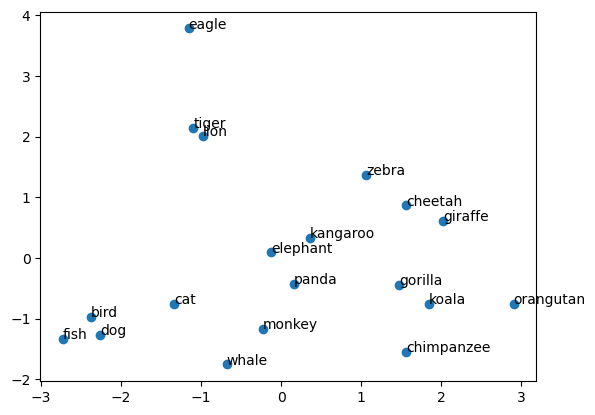

In [39]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

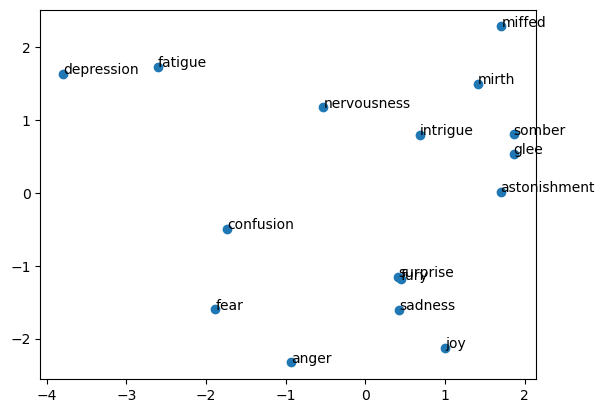

In [40]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["joy", "sadness", "anger", "glee", "mirth", "depression", "somber", "fury", "miffed", "confusion", "fatigue", "astonishment", "surprise", "intrigue", "nervousness", "fear" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Honestly, I can't make sense of this at all. Some of them make sense, like depression is close to fatigue, confusion/fear/anger are sort of close to one another, but then there's a ton of stuff that doesn't make much sense at all, like joy is much closer to sadness than it is to glee, or mirth. Surprise is right on top of fury but nowhere near astonishment, etc. It seems maybe not fully baked...

[==================================================] 100.0% 387.1/387.1MB downloaded


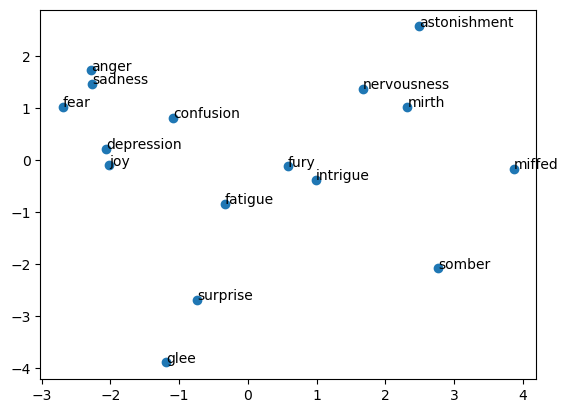

In [43]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

words=["joy", "sadness", "anger", "glee", "mirth", "depression", "somber", "fury", "miffed", "confusion", "fatigue", "astonishment", "surprise", "intrigue", "nervousness", "fear" ]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

This one doesn't make sense either. Somehow "surprise" and "astonishment" are even farther apart now. The anger/fear/sadness cluster is much closer now, but so is depression and joy. I guess my choice of words wasn't particularly good: these are all emotions, and so in many contexts they can just replace each other. I also wasn't particularly consistent about what form of the emotion I decided to use as the word, so that could have a role in why this is weird too. Doesn't seem much better than tea leaves in this state to me. 

Part 3: Embedding reddit posts

In [45]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [56]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import spacy
language_model = spacy.load("en_core_web_sm")


def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [48]:
%pip install -U sentence-transformers

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
    --------------------------------------- 3.9/204.1 MB 19.5 MB/s eta 0:00:11
   - -------------------------------------- 7.1/204.1 MB 17.4 MB/s eta 0:00:12
   - -------------------------------------- 9.7/204.1 MB 15.5 MB/s eta 0:00:13
   -- ------------------------------------- 12.6/204.1 MB 14.9 MB/s eta 0:00:13
   --- ------------------------------------ 16.5/204.1 MB 15.7 MB/s eta 0:00:12
   ---- ----------------------------------- 20.4/204.1 MB 16.1 MB/s eta 0:00:12
   ---- ----------------------------------- 23.6/204.1 MB 16.2 MB/s eta 0:00:12
   ----- ---------------------------------- 28.0/204.1 MB 16.6 MB/s eta 0:00:11
   ------ --------------------------------- 32.0/204.1 MB 16.8 MB/s eta 0:00:11
   ------ --------------------------------- 35.4/204.1 MB 16.8 MB/s eta 0:00:11
   ------- -------------------------------- 39.6/204.1 MB 17.0 MB/s eta 0:00:10
   -------- ------------------------------- 43.0/204

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [51]:
from sentence_transformers import SentenceTransformer
model2 = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Sentences we want to encode. Example:
sentence = ['This framework generates embeddings for each input sentence']

# Sentences are encoded by calling model.encode()
embedding = model2.encode(sentence)

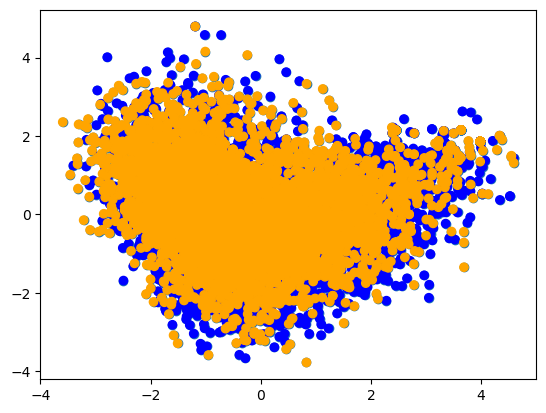

In [57]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
sentences=data["lemmatized_text"]

X=[model2.encode(s) for s in sentences]

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

colors = ['blue' if label == 1 else 'orange' for label in data['label']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

plt.show()
#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

There is not a clear seperation between the columns. We can see that perhaps Michigan's subreddit is a little more focused than UIUC, which seems to spread out more in all directions, but that could easily be a result of our sample/sampling methods.

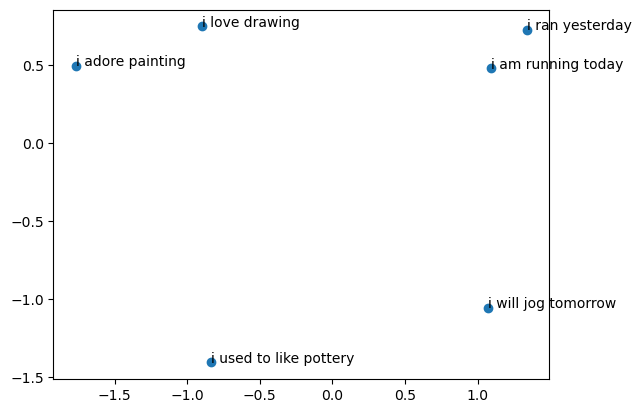

In [58]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

3    1
3    0
Name: label, dtype: int64

d:\josep\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\josep\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


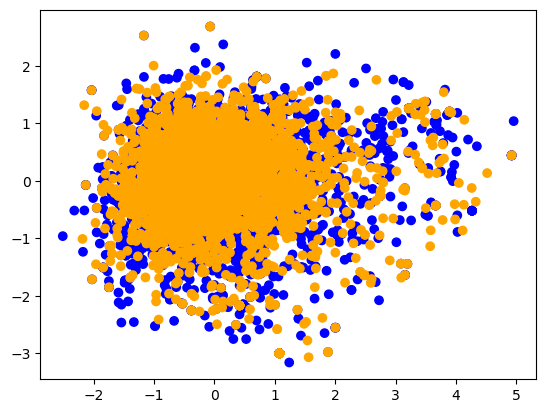

In [72]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column
data=data.reset_index(drop=True)
sentences=data["lemmatized_text"]
#we can then calculate the average embedding of each sentence

avg_embeddings = []
colors = []

for i, sentence in enumerate(sentences):
    embedding = avg_embedding(sentence, model)
    if embedding is not None and not np.isnan(embedding).any():
        avg_embeddings.append(embedding)
        colors.append('blue' if (data['label'].loc[i] == 1) else 'orange')

# Convert avg_embeddings to a 2D numpy array
avg_embeddings = np.array(avg_embeddings)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1], c=colors)

plt.show()

#how is this plot different from the previous one?

#is there clear separation? 

There's still not any clear separation. This plot is similar in overall shape to the other one, but is much more concentrated on the "left" side, whatever that means. That sort of what I would expect from an "average" embedding, since taking an average tends to distill the information. 

Part 4: HuggingFace and BERT

In [73]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [74]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

d:\josep\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\josep\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regul

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [92]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I haven't slept in days!")

[{'label': 'NEG', 'score': 0.9071009159088135}]

In [ ]:
valid_texts = data["lemmatized_text"].dropna().str.strip()
valid_texts = valid_texts[valid_texts != ""]


sentiments = []
for i in range(len(data["lemmatized_text"])):
    sentiment = 0
    try:
        sentiment = pipe(data["lemmatized_text"].loc[i])[0]["label"]
    except IndexError:
        sentiments.append(None)
        continue
    sentiments.append(sentiment)
data["sentiments"] = sentiments


In [99]:
# Report the most common sentiment label
data["sentiments"].value_counts()

sentiments
NEU    6232
NEG    1792
POS    1353
Name: count, dtype: int64

Unsurprisingly, the most common sentiment label is NEU or neutral.

In [104]:
#look at ten sample posts and labels; do you agree with all of them? 
pd.set_option('display.max_colwidth', None)
data[["cleaned_text", "sentiments"]].head(10)

,cleaned_text,sentiments
0,have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture,NEU
1,do you find it helpful to still go to the lecture it seems to me that his slides are embedded with mistakes here and there it makes it more confusing for me to understand him,NEG
2,have you tried emailing university housing to request access,NEU
3,purchasing illini cash should get you added to the nonresident meal plan card access level these generally allow you access to whatever is considered the front door of the residence hall with access to the dining hall at par that would be the doors facing the bus stop on the south side of the building only the mag stripe reader will work prox access in most of the residence halls is currently only activated for residents with ada needs,NEU
4,just did thanks for the suggestion it hadnt occurred to me to do that,NEU
5,is there a lower limit for that i have some illini cash left over from last year though it is less than,NEU
6,theres a policy about fees for inactive accounts httpswwwhousingillinoisedudinepurchaseillinicash so you may not have any illini cash left you can check your existing balance at httpswebhousingillinoiseduillinicash other than that adding some amount of illini cash should get you added to the nonresident meal plan access level that gets you to dining areas during serving hours,NEU
7,i used to have the same problem you just have to make sure that you installed the configuration on your device if that wouldnt work register it,NEG
8,on the bright side no shadow ban,NEU
9,bookstor,NEU


I agree with most of them: many are just providing information and are therefore neutral. The only one I maybe disagree with is that "on the bright side, no shadow ban" one. It seems more positive than neutral to me, although I suppose the mention of a "shadow ban" might be balancing out "on the bright side."

In [106]:
#is the UIUC or Michigan subreddit more negative?
subreddit = "UIUC" if len(data[(data["label"] == 1) & (data["sentiments"] == "NEG")])/len(data[data["label"] == 1]) >= len(
    data[(data["label"] == 0) & (data["sentiments"] == "NEG")])/len(data[data["label"] == 0]) else "Michigan"
print(subreddit)

Michigan


Michigan is more negative. UIUC sweep.